In [21]:
!pip install matplotlib nltk
!pip install seaborn



In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words
stop_words = stopwords.words('english')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Example documents list (replace with your actual data)
documents = [
    "The quick brown fox jumps over the lazy dog.",
    "Never jump over the lazy dog quickly.",
    "The sky is blue and the sun is shining.",
    "The quick brown fox is running fast."
]


In [24]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words)
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)


In [25]:
# Apply LSA (Latent Semantic Analysis)
lsa_model = TruncatedSVD(n_components=4, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(tfidf_matrix)


In [26]:
# Display LSA topics
print("LSA Topics:")
for i, topic in enumerate(lsa_model.components_):
    terms = np.array(tfidf_vectorizer.get_feature_names_out())
    sorted_terms = terms[np.argsort(topic)[::-1]]
    print(f"Topic {i + 1}: {', '.join(sorted_terms[:10])}")


LSA Topics:
Topic 1: quick, fox, brown, lazy, dog, jumps, running, fast, quickly, never
Topic 2: blue, sun, sky, shining, jumps, quick, fox, brown, lazy, dog
Topic 3: quickly, never, jump, dog, lazy, sun, sky, shining, jumps, blue
Topic 4: jumps, lazy, dog, quick, fox, brown, blue, sun, sky, shining


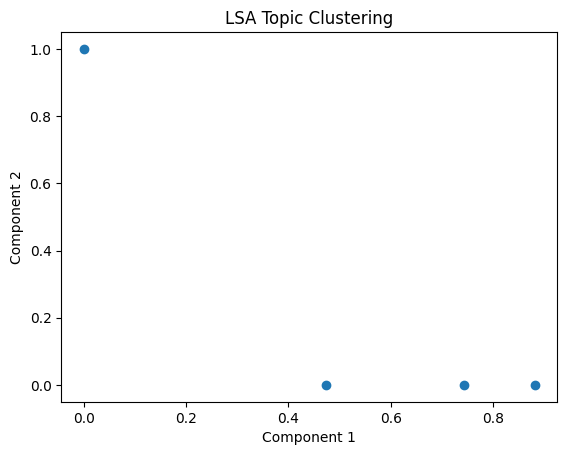

In [27]:
# Visualization of LSA components
plt.scatter(lsa_topic_matrix[:, 0], lsa_topic_matrix[:, 1])
plt.title('LSA Topic Clustering')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


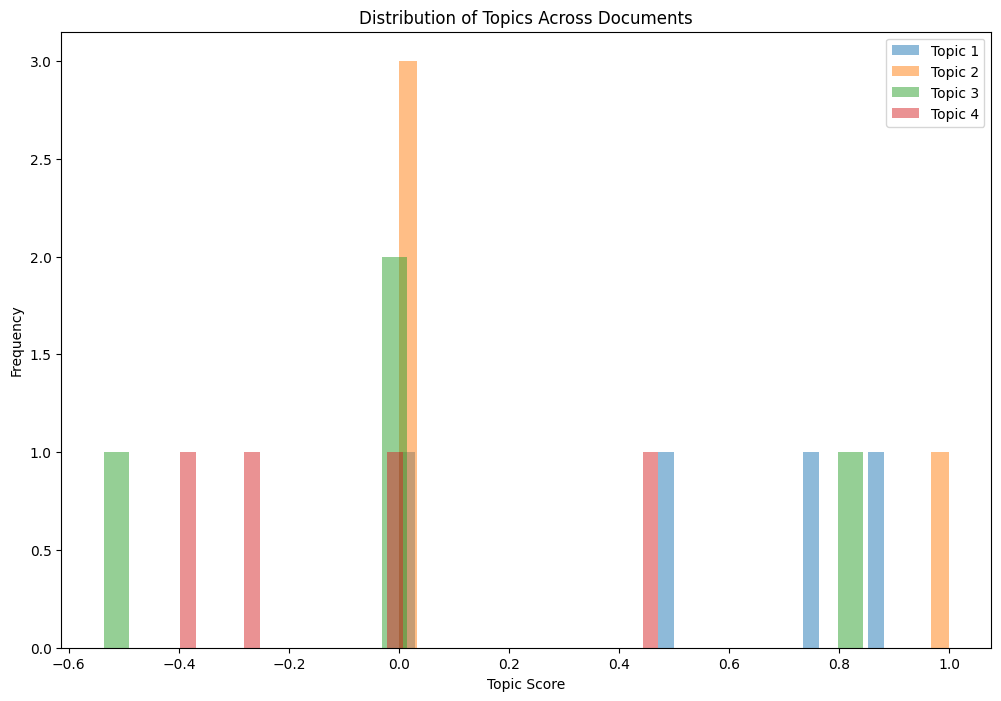

In [29]:
# Create a histogram of topic distributions
plt.figure(figsize=(12, 8))
for i in range(lsa_topic_matrix.shape[1]):
    plt.hist(lsa_topic_matrix[:, i], bins=30, alpha=0.5, label=f'Topic {i+1}')

plt.title('Distribution of Topics Across Documents')
plt.xlabel('Topic Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()
